# Додаткові завдання №5

## 1 Задача 1.10.10
Випадкова величина $\xi$ має щiльнiсть $p(x) = e^{-2 |x|}$.
Обчислити
1. $\mathsf{P}(\xi < 1)$;
2. $\mathsf{P}(\xi < 3|\xi \geq 2)$;
3. $\mathsf{E}\xi, \mathsf{D}\xi$.

### 1.1 Завдання 1
Реалізуйте випадкову величину $\xi$ за допомогою класу [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html).

In [26]:
import numpy as np
from scipy.stats import rv_continuous

class my_rv(rv_continuous):
    "My distribution"
    def _pdf(self, x):
        return np.exp(-2*abs(x)) 

rv = my_rv()

### 1.2 Завдання 2
Зобразіть графічно функцію щільності та функцію розподілу отриманої випадкової величини.

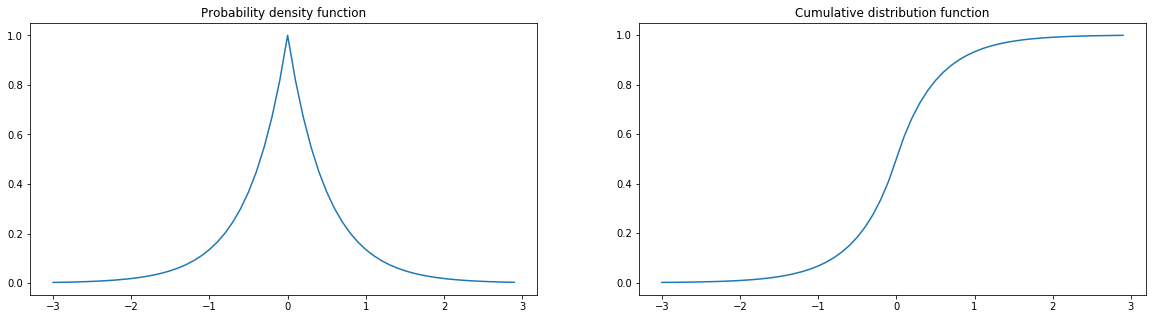

In [27]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))

x = np.arange(-3, 3, 0.1)

plt.subplot(1, 2, 1)
plt.plot(x, rv.pdf(x))
plt.title("Probability density function")

plt.subplot(1, 2, 2)
plt.plot(x, rv.cdf(x))
plt.title("Cumulative distribution function")

plt.show()

### 1.3 Завдання 3
Розв'яжіть задачу за допомогою отриманої випадкової величини та порівняйте результати з теоретично розрахованими.

In [25]:
import scipy.integrate as integrate
import scipy.special as special

# number of tests
n = 1000

def task1_t():
    return rv.cdf(1)

def task1_e():
    rvs = rv.rvs(size=n)
    return len(list(filter(lambda x: x < 1, rvs))) / n

def task2_t():
    return (rv.cdf(3) - rv.cdf(2)) / (1 - rv.cdf(2))

def task2_e():
    rvs = rv.rvs(size=n)
    numerator = len(list(filter(lambda x: 2 <= x < 3, rvs))) / n
    denominator = len(list(filter(lambda x: x >= 2, rvs))) / n
    return numerator / denominator

def task3_t():
    E = integrate.quad(lambda x: x * np.exp(-2*abs(x)), -float('inf'), float('inf'))[0]
    D = integrate.quad(lambda x: x ** 2 * np.exp(-2*abs(x)), -float('inf'), float('inf'))[0] - E ** 2;
    return E, D

def task3_e():
    E, D = rv.stats()
    return E, D

#print("P(ksi < 1):\nTheoretically: {}\nEmpirically: {}\n".format(task1_t(), task1_e()))
#print("P(ksi < 3 | ksi >= 2):\nTheoretically: {}\nEmpirically: {}\n".format(task2_t(), task2_e()))

t = task3_t();
e = task3_e();
print("E(ksi):\nTheoretically: {}\nIn-built functions: {}\n".format(t[0], e[0]))
print("D(ksi):\nTheoretically: {}\nIn-built functions: {}\n".format(t[1], e[1]))

E(ksi):
Theoretically: 0.0
In-built functions: -6.435526884731364e-09

D(ksi):
Theoretically: 0.49999999999999994
In-built functions: 0.500001340348757



## 2 Апроксимація числа $\pi$ (задача Бюффона)

Розглянемо дві паралельні прямі на площині, відстань між якими дорівнює $1$. Не втрачаючи загальності, нехай ці прямі задаються рівностями $y = 0$ та $y = 1$. Кинемо на цю площину голку довжиною $1$ так, що координата по осі $y$ її середини рівномірно розподілена на $[0,1]$, а кут між голкою та віссю $x$ (додатною піввіссю $x$) рівномірно розподілений на $[0, \pi]$. Тоді ймовірність того, що голка перетне будь-яку з паралельних прямих, дорівнює $2/\pi$.

Реалізуйте функцію емпіричної апроксимації числа $\pi$ за $n$ симуляцій (кидання $n$ голок). Зобразіть графічно отримані елементи: паралельні прямі та всі голки. Виділіть точки, що належать колу, окремим кольором від інших точок.

Виведіть результат функції для:
1. $n = 10$
2. $n = 100$
3. $n = 500$
4. $n = 1000$

3.3333333333333335
3.4482758620689657
3.2258064516129035
3.2414910858995136


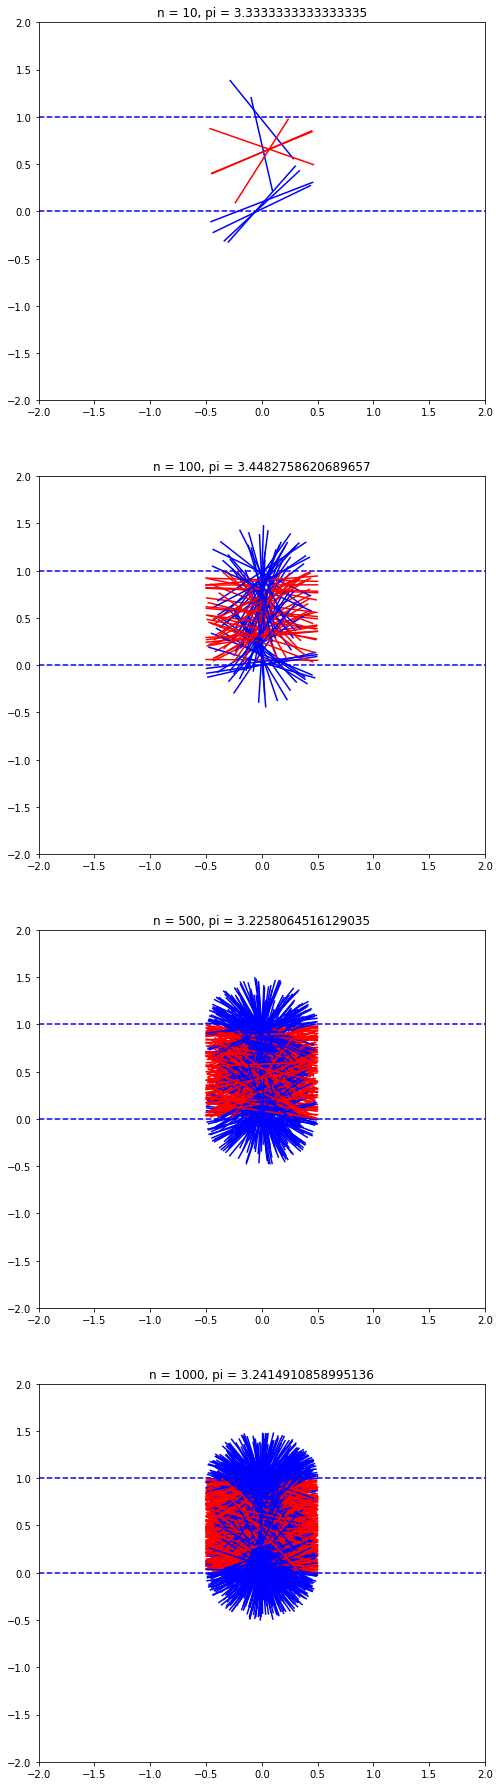

In [28]:
from scipy.stats import uniform

fig, ax = plt.subplots(4, 1, figsize=(8, 32))

def e_prob(n, i):
    pi = 0
    y = uniform.rvs(0, 1, size=n)
    phi = uniform.rvs(0, np.pi, size=n)
    points = zip(y, phi)
    
    ax[i].plot([-5, 5], [1, 1], 'b--')
    ax[i].plot([-5, 5], [0, 0], 'b--')
    
    for p in points:
        x1, y1 = np.cos(p[1]) * 0.5, np.sin(p[1]) * 0.5 + p[0]
        x2, y2 =-np.cos(p[1]) * 0.5,-np.sin(p[1]) * 0.5 + p[0]
        
        if y1 >= 1 or y2 <= 0:
            pi += 1 
            ax[i].plot([x1, x2], [y1, y2], color='b')
        else:
            ax[i].plot([x1, x2], [y1, y2], color='r')
            
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    
    ax[i].set_title("n = {}, pi = {}".format(n, 2 * (pi / n) ** (-1)))
        
    return 2 * (pi / n) ** (-1)
    

a = 1
n = [10, 100, 500, 1000]
i = 0
for n in n:
    ep = e_prob(n, i)
    print(ep)
    i += 1
